In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


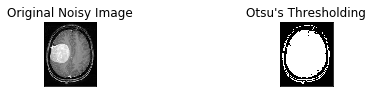

In [55]:
##STEP 1------Otsu's method and Binarization-----
img = cv2.imread('Y1.jpg',0)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#T = graythresh(img)
# plot all the images and their histograms
images = [img, 0, th2]
titles = ['Original Noisy Image','Histogram',"Otsu's Thresholding"]
i=0
plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.savefig('images[2].jpg')
plt.show()

In [56]:
print("Otsu's Threshold:",ret2)#global threshold value

Otsu's Threshold: 74.0


174.0


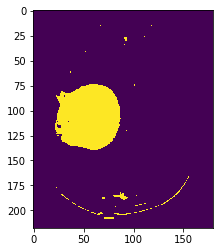

In [57]:
#STEP 2---- Computing a threshold level to convert intensity image to binary image
ret,thresh1 = cv2.threshold(img,174,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)
print(ret)
#####Computed the threshold level using hit and trial

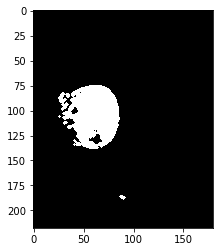

In [51]:
##STEP 3 ------Equivalent Step to bwareaopen of matlab removes noisy edges--------
from scipy import ndimage
opening=ndimage.binary_opening(thresh1).astype(int)# Opening removes small objects
plt.imshow(opening,'gray')##Input was the binary image obtained in step 2

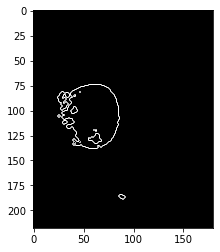

In [52]:
##STEP 4.1.1. ------Robert operator------
from skimage import filters
edge_roberts = filters.roberts(opening)
plt.imshow(edge_roberts,'gray')

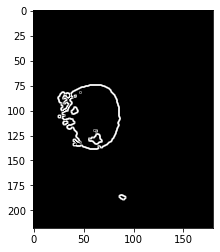

In [53]:
#STEP 4.1.2. -------Sobel operator--------
edge_sobel = filters.sobel(opening)
plt.imshow(edge_sobel,'gray')

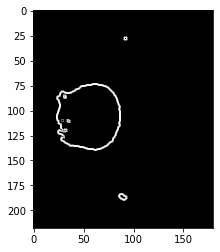

In [38]:
#STEP 4.1.3. ----Prewitt operator-----
edge_prewitt = filters.prewitt(opening)
plt.imshow(edge_prewitt,'gray')

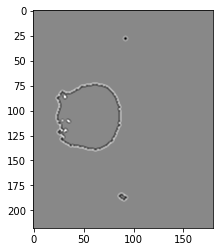

In [48]:
#STEP 4.2.1. -----Laplacian of Gaussian (LoG) or Marr Hildrith operator-----
# Apply Gaussian Blur

blur = cv2.GaussianBlur((opening*255).astype(np.uint8),(3,3),0)
 
# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
plt.imshow(laplacian,'gray')

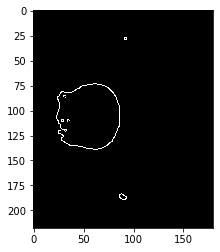

In [46]:
#STEP 4.3 Canny Operator
cannyedges = cv2.Canny((opening*255).astype(np.uint8),0,1)
plt.imshow(cannyedges,'gray')#took the original image since canny has its 5 own steps